In [45]:
import keras
keras.__version__

'2.3.1'

In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
print(train_images.shape, train_labels) # numpy array이기 때문에 shape 가능

(60000, 28, 28) [5 0 4 ... 5 6 8]


In [ ]:
print(train_labels.shape)

(60000,)


In [ ]:
print(test_images.shape)

(10000, 28, 28)


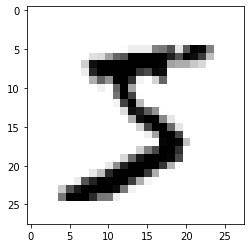

5


In [ ]:
import matplotlib.pyplot as plt
digit = train_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
print(train_labels[0])

Dense (Fully connected Layer) : 완전연결층<br>
뉴런의 개수 : 512<br>
28*28인 이미지를 뉴런에 넣어주기 위해 1차원 형태로 reshape(Flatten)<br>
입력수 : 784<br>
w : 784<br>
b : 1<br>

Dense Layer인 512는 정하기 나름이다. 이 값은 경험을 통해 Overfitting 되지 않도록 값을 수정해야한다.<br>

In [ ]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

In [ ]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
train_images = train_images.reshape((60000, 28 * 28)) # Flatten : reshape(60000, 784)
train_images = train_images.astype('float32') / 255 # 정규화, glayscale을 255로 나눠서 scale을 0~1로 변경(python의 elementwise-operation)
                                                    # 정규화를 하는 이유 : w가 0~1사이의 값이기 때문에 적은 범위에서 변화를 가지기 위해 입력값도 정규화하는 것이다.
                                                    
test_images = test_images.reshape((10000, 28 * 28)) 
test_images = test_images.astype('float32') / 255

In [ ]:
train_labels[0]

5

In [ ]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
network.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.2550 - accuracy: 0.9273
Epoch 2/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.1020 - accuracy: 0.9701
Epoch 3/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.0662 - accuracy: 0.9801
Epoch 4/5
60000/60000 [==============================] - 4s 75us/step - loss: 0.0494 - accuracy: 0.9845
Epoch 5/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.0369 - accuracy: 0.9889


In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels) # Foward Propagation만 해서 테스트

10000/10000 [==============================] - 0s 49us/step


In [40]:
print('test_loss: ', test_loss)
print('test_acc: ', test_acc)

test_loss:  0.06922140502338298
test_acc:  0.978600025177002


---

In [41]:
prediction = network.predict(test_images)

In [42]:
prediction[0]

array([8.7259722e-10, 2.7624111e-10, 1.1783760e-06, 6.6265925e-06,
       1.5120381e-13, 5.8028942e-09, 3.3259240e-15, 9.9999189e-01,
       1.0454229e-08, 1.8385323e-07], dtype=float32)

In [48]:
import numpy as np
np.max(prediction[0])

0.9999919

In [49]:
np.argmax(prediction[0])

7

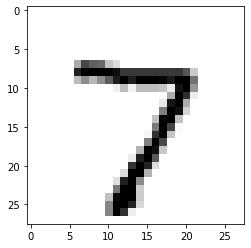

In [51]:
import matplotlib.pyplot as plt
digit = np.reshape(test_images[0], (28,28)) # Flatten을 취했기 때문에, 이미지를 보기 위해 다시 28*28의 형태로 바꿔줘야한다.
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()